In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, ttest_rel

In [2]:
method_order = ['RADO', 'scDblFinder', 'vaeda', 'DoubletFinder', 'solo', 'hybrid', 'Scrublet', 'bcds', 'cxds']

In [3]:
auprc = pd.read_csv('./figure2/F1.csv',index_col=0)

In [4]:
auprc

,HEK-HMEC-MULTI,HMEC-orig-MULTI,HMEC-rep-MULTI,J293t-dm,cline-ch,hm-12k,hm-6k,mkidney-ch,nuc-MULTI,pbmc-1A-dm,pbmc-1B-dm,pbmc-1C-dm,pbmc-2ctrl-dm,pbmc-2stim-dm,pbmc-ch,pdx-MULTI,DOGMAseq1-RNA-ch,DOGMAseq-DIG-RNA-ch
DoubletFinder,0.368000,0.400310,0.368860,0.091636,0.290839,0.721032,0.988000,0.282158,0.351700,0.415741,0.277313,0.450588,0.474240,0.221680,0.266969,0.353523,0.583000,0.653000
Scrublet,0.501377,0.328264,0.000609,0.212766,0.276765,0.830838,0.927711,0.195154,0.057260,0.151515,0.325359,0.287081,0.549734,0.553835,0.436640,0.001517,0.528875,0.000000
bcds,0.396843,0.373421,0.411546,0.177215,0.316401,0.618582,0.612717,0.382033,0.378910,0.405063,0.350877,0.495553,0.651105,0.675061,0.565288,0.431252,0.629157,0.692890
cxds,0.478528,0.407439,0.381140,0.163934,0.300490,0.670345,0.472376,0.387181,0.363819,0.318302,0.231537,0.350917,0.526910,0.441379,0.546294,0.302622,0.559512,0.604968
hybrid,0.460744,0.442428,0.417175,0.181818,0.337079,0.762887,0.705394,0.432226,0.372661,0.446991,0.327711,0.456392,0.668207,0.671412,0.587051,0.386721,0.685706,0.742296
RADO,0.507289,0.478823,0.448542,0.210526,0.299087,0.766562,0.814286,0.407906,0.441774,0.448485,0.401042,0.551539,0.710296,0.713418,0.649134,0.465339,0.714666,0.773995
scDblFinder,0.468641,0.492382,0.460557,0.175439,0.342105,0.695946,0.510448,0.461302,0.423480,0.589928,0.482353,0.581006,0.731111,0.710731,0.651522,0.441345,0.694572,0.748083
solo,0.504559,0.236723,0.461755,0.188679,0.349312,0.834003,0.750000,0.510743,0.270703,0.339367,0.251627,0.462541,0.693156,0.717425,0.635556,0.408850,0.710563,0.764174
vaeda,0.418929,0.491424,0.401987,0.090909,0.325581,0.739949,0.617060,0.411490,0.421308,0.564706,0.451613,0.588419,0.706093,0.672368,0.604078,0.432477,0.699479,0.749308


In [84]:
auprc.max(axis=0)# cxds, vaeda, rado, scrublet, scdbl, cxds, cxds, solo, rado, vaeda, scdbl, scdbl,
# rado, rado, rado, rado, solo, rado

# Rado, scdbl, solo, scrublet, solo, solo, scrublet, solo, 
# RADO, scdbl, scdbl, vaeda, scdbl, solo, scdbl, RADO, RADO, RADO
5
5
5
2
1

HEK-HMEC-MULTI         0.507289
HMEC-orig-MULTI        0.492382
HMEC-rep-MULTI         0.461755
J293t-dm               0.212766
cline-ch               0.349312
hm-12k                 0.834003
hm-6k                  0.927711
mkidney-ch             0.510743
nuc-MULTI              0.441774
pbmc-1A-dm             0.589928
pbmc-1B-dm             0.482353
pbmc-1C-dm             0.588419
pbmc-2ctrl-dm          0.731111
pbmc-2stim-dm          0.717425
pbmc-ch                0.651522
pdx-MULTI              0.465339
DOGMAseq1-RNA-ch       0.714666
DOGMAseq-DIG-RNA-ch    0.773995
dtype: float64

In [5]:
auprc = auprc.loc[method_order]

In [6]:
table1 = pd.DataFrame(index=method_order, columns=method_order)

In [7]:
def mk_heatmap(hm, title = 'Heatmap'):

    hm_norm = hm.rank(axis=1, method='max')

    fig, (ax,ax2) = plt.subplots(ncols=1,nrows=2,gridspec_kw=dict(height_ratios=[16,1]),
                                 figsize=(0.9*5,0.9*4.5),
                                 dpi=300)
    
    sns.heatmap(hm_norm, square=False, ax=ax, cbar=False, 
                annot=hm, cmap="YlOrRd",  fmt='g', 
                xticklabels = False, annot_kws={'size': 8}, yticklabels=True)#, cbar_kws=cbar_kws) #YlOrRd
    ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
    ax.tick_params(axis="y", labelsize=8)
    ax.tick_params(bottom=False)

    
    
    hm = np.round(pd.DataFrame(hm.mean(axis=0)).T, 1) 
    hm.index = ['mean']

    sns.heatmap(hm, square=False, cbar=False, annot=hm, cmap="YlOrRd",  fmt='g',
               xticklabels=True, yticklabels=True, annot_kws={'size': 8})#, cbar_kws=cbar_kws) #YlOrRd
    ax2.set_yticklabels(ax2.get_yticklabels(),rotation=0)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=70, horizontalalignment='right')
    ax2.tick_params(axis="y", labelsize=8)
    #a.xticks(rotation=45, horizontalalignment='right')
    ax2.tick_params(axis="x", labelsize=10)

    ax.set_title(title)
    
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.05)
    fig.subplots_adjust(wspace=10)

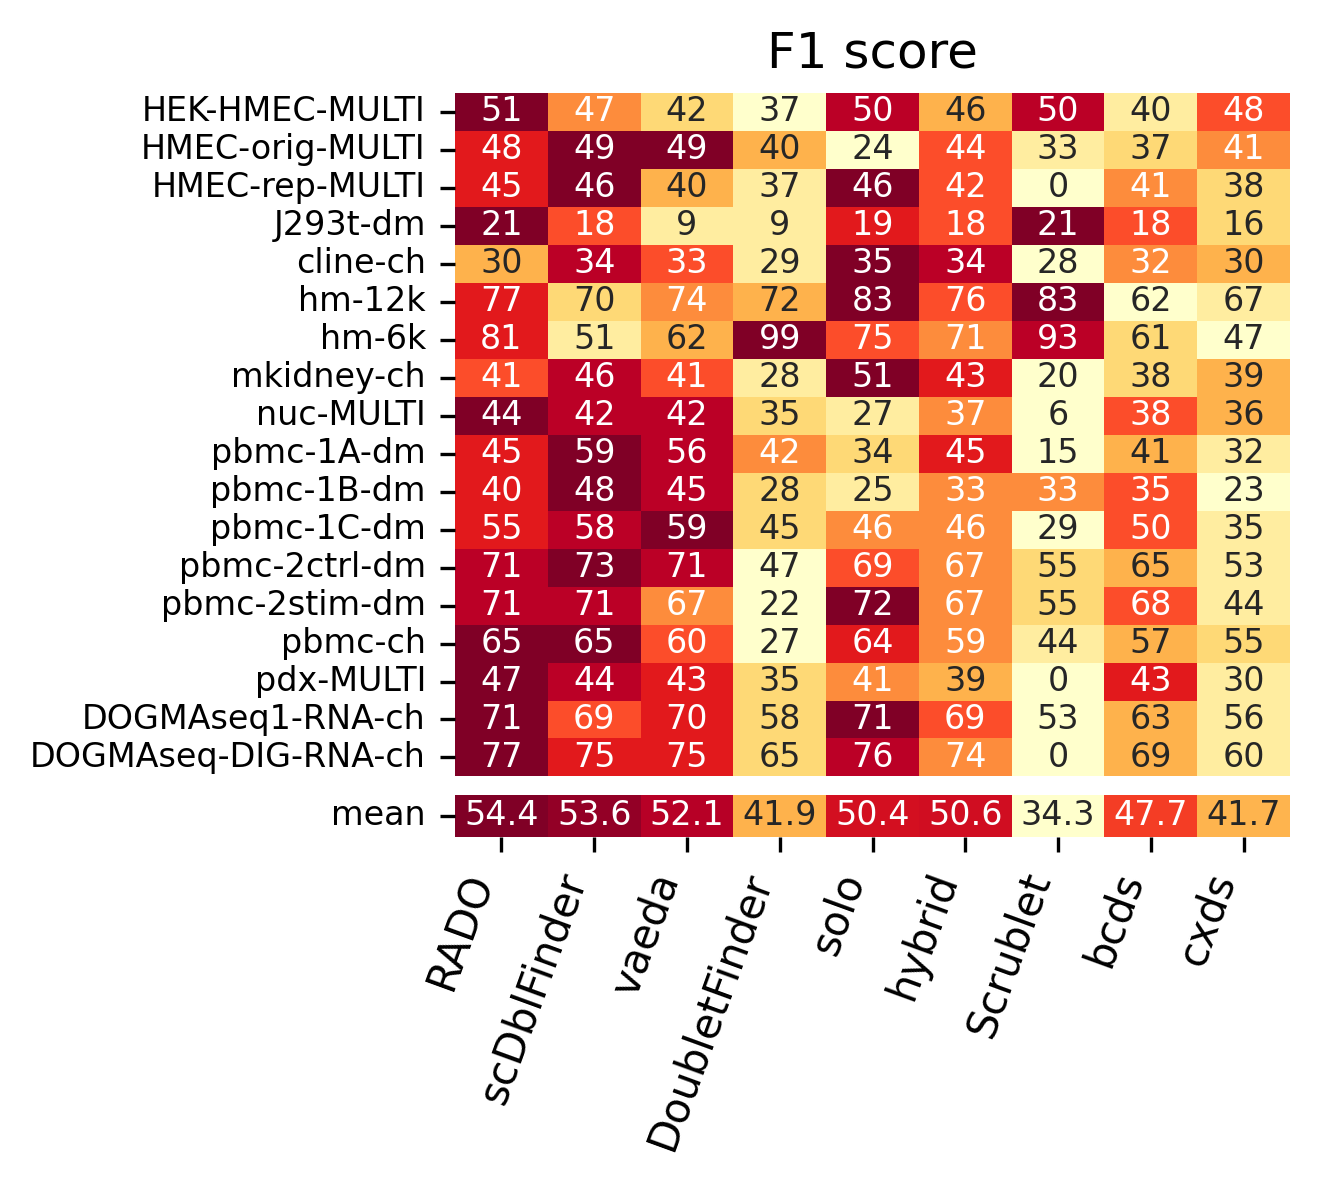

In [8]:
mk_heatmap(np.round(auprc.T*100,0), title = 'F1 score')
plt.savefig('./figure2/F1_heatmap.eps', dpi=300, format='eps')

In [6]:
for method1 in auprc.index:
    for method2 in auprc.index:
        if method1 != method2:
            values1 = auprc.loc[method1]
            values2 = auprc.loc[method2]
            statistic, p_value = wilcoxon(values1, values2, alternative='greater')
            if p_value < 0.05:
                table1.loc[method1,method2] = '>'
            elif p_value > 0.95:
                table1.loc[method1,method2] = '<'
            else:
                table1.loc[method1,method2] = 'ns'
            # print([method1, method2, statistic, p_value])
            

In [7]:
table1

,RADO,scDblFinder,vaeda,DoubletFinder,solo,hybrid,Scrublet,bcds,cxds
RADO,NaN,>,>,>,>,>,>,>,>
scDblFinder,<,NaN,ns,>,>,>,>,>,>
vaeda,<,ns,NaN,>,ns,>,>,>,>
DoubletFinder,<,<,<,NaN,ns,>,>,>,>
solo,<,<,ns,ns,NaN,ns,>,ns,>
hybrid,<,<,<,<,ns,NaN,>,ns,>
Scrublet,<,<,<,<,<,<,NaN,ns,ns
bcds,<,<,<,<,ns,ns,ns,NaN,ns
cxds,<,<,<,<,<,<,ns,ns,NaN


In [9]:
f1score = pd.read_csv('./figure2/F1.csv',index_col=0)
table2 = pd.DataFrame(index=method_order, columns=method_order)
for method1 in f1score.index:
    for method2 in f1score.index:
        if method1 != method2:
            values1 = f1score.loc[method1]
            values2 = f1score.loc[method2]
            statistic, p_value = wilcoxon(values1, values2, alternative='greater')
            if p_value <= 0.05:
                table2.loc[method1,method2] = '>'
            elif p_value >= 0.95:
                table2.loc[method1,method2] = '<'
            else:
                table2.loc[method1,method2] = 'ns'
            # print([method1, method2, statistic, p_value])
            

In [10]:
table2

,RADO,scDblFinder,vaeda,DoubletFinder,solo,hybrid,Scrublet,bcds,cxds
RADO,NaN,ns,ns,>,>,>,>,>,>
scDblFinder,ns,NaN,>,>,ns,>,>,>,>
vaeda,ns,<,NaN,>,ns,ns,>,>,>
DoubletFinder,<,<,<,NaN,<,<,ns,<,ns
solo,<,ns,ns,>,NaN,ns,>,ns,>
hybrid,<,<,ns,>,ns,NaN,>,>,>
Scrublet,<,<,<,ns,<,<,NaN,<,ns
bcds,<,<,<,>,ns,<,>,NaN,>
cxds,<,<,<,ns,<,<,ns,<,NaN


In [10]:
auroc = pd.read_csv('./figure2/AUROC.csv',index_col=0)
table3 = pd.DataFrame(index=method_order, columns=method_order)
for method1 in auroc.index:
    for method2 in auroc.index:
        if method1 != method2:
            values1 = auroc.loc[method1]
            values2 = auroc.loc[method2]
            statistic, p_value = wilcoxon(values1, values2, alternative='greater')
            if p_value <= 0.05:
                table3.loc[method1,method2] = '>'
            elif p_value >= 0.95:
                table3.loc[method1,method2] = '<'
            else:
                table3.loc[method1,method2] = 'ns'
            # print([method1, method2, statistic, 

In [11]:
table3

,RADO,scDblFinder,vaeda,DoubletFinder,solo,hybrid,Scrublet,bcds,cxds
RADO,NaN,>,>,>,ns,>,>,>,>
scDblFinder,<,NaN,ns,ns,ns,ns,>,>,>
vaeda,<,ns,NaN,ns,ns,ns,>,>,>
DoubletFinder,<,ns,ns,NaN,ns,ns,>,ns,>
solo,ns,ns,ns,ns,NaN,ns,>,ns,>
hybrid,<,ns,ns,ns,ns,NaN,>,>,>
Scrublet,<,<,<,<,<,<,NaN,<,<
bcds,<,<,<,ns,ns,<,>,NaN,>
cxds,<,<,<,<,<,<,ns,<,NaN


In [12]:
auprc = pd.read_csv('./figure2/AUPRC.csv',index_col=0)
auroc = pd.read_csv('./figure2/AUROC.csv',index_col=0)
f1score = pd.read_csv('./figure2/F1.csv',index_col=0)

In [13]:
auprc['method'] = auprc.index
auroc['method'] = auroc.index
f1score['method'] = f1score.index
auprc = pd.melt(auprc, id_vars='method')
auroc = pd.melt(auroc, id_vars='method')
f1score = pd.melt(f1score, id_vars='method')

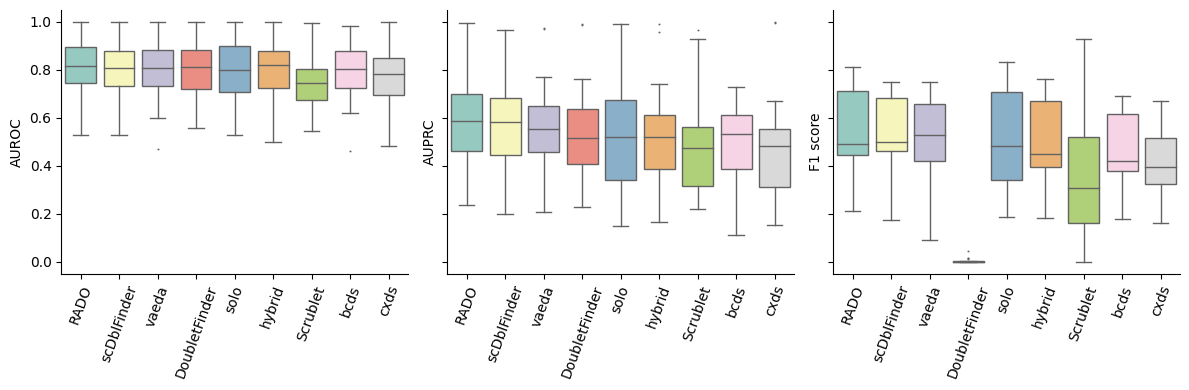

In [14]:
method_order = ['RADO', 'scDblFinder', 'vaeda', 'DoubletFinder', 'solo', 'hybrid', 'Scrublet', 'bcds', 'cxds']
fig, axes = plt.subplots(1,3,sharex=True, sharey=True,figsize=(12,4))
sns.boxplot(x='method', y='value', data=auroc, palette='Set3',
            fliersize=0.5,linewidth=1, width=0.8,
            order=method_order, ax=axes[0])
sns.boxplot(x='method', y='value', data=auprc, palette='Set3',
            fliersize=0.5,linewidth=1, width=0.8,
            order=method_order, ax=axes[1])
sns.boxplot(x='method', y='value', data=f1score, palette='Set3',
            fliersize=0.5,linewidth=1, width=0.8,
            order=method_order, ax=axes[2])


# Hide top and right spines
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Set y-axis labels
axes[0].set_ylabel('AUROC')
axes[1].set_ylabel('AUPRC')
axes[2].set_ylabel('F1 score')

# Rotate x labels
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    ax.set_xlabel('')
    
# Adjust layout
plt.tight_layout()
fig.savefig('figure2.eps', format='eps')
# Show the plot
plt.show()